# Ford Go Bike (Bay  Wheels by Lyft) Data visualisation
### by Suryaday Nath


**Introduction**

Bay Wheels is a regional public bicycle sharing system operated by Motivate in partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District, in the San Francisco Bay Area, California. 

Bay Wheels is the first national and large-scale cycling sharing program to be deployed both in California and on the US West Coast. It was founded in August 2013 as Bay Area Bike Share. The Bay Wheels network had more than 2600 bicycles in 262 stations across San Francisco, East Bay and San Jose as of January 2018.

The system officially re-launched on 28 June 2017 in a partnership with Ford Motor Company as Ford GoBike. The system was subsequently renamed to Bay Wheels in June 2019 following Lyft 's acquisition of Motivate. The network is planned to extend to about 540 stations in San Francisco, Oakland, Berkeley, Emeryville and San Jose to 7,000 bicycles.

## Table of Contents

## Preliminary Wrangling

In [10]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import glob
import math
#from math import sin, cos, sqrt, atan2, radians

%matplotlib inline

In [4]:
os.chdir('C:\\Users\\Hp\\Desktop\\Communicatte Data  Findings')

### Loading the dataset

In [ ]:
#This path contains all the csv files for a particular year, in this case, 2018 data for all months in csv
#Merging all the files in a common csv file

path = r'C:\Users\Hp\Desktop\UDAcity\Compressed\FORD'
all_files = glob.glob(path + "/*.csv")
lst=[]

for filename in all_files:
    frame = pd.read_csv(filename, index_col=None, header=0)
    lst.append(frame)

#Creating Dataframe
df = pd.concat(lst, axis=0, ignore_index=True)

In [ ]:
#Creating a local file so that I don't have to run the above process multiple times
df.to_csv('bike.csv', index=False)

#Creating backup
df2 = df.copy(deep=True)

In [5]:
#This is the local file 
df = pd.read_csv('bike.csv')

In [27]:
#Displaying the 1st 5 rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


In [28]:
#Sampling the data to get a feel for the dataset
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
575929,264,2018-05-09 08:35:02.2170,2018-05-09 08:39:26.8860,123.0,Folsom St at 19th St,37.760594,-122.414817,108.0,16th St Mission BART,37.764710,-122.419957,714,Subscriber,No
290402,527,2018-03-07 18:59:50.2500,2018-03-07 19:08:37.3110,27.0,Beale St at Harrison St,37.788059,-122.391865,342.0,Colin P Kelly Jr St at Townsend St (Temporary ...,37.781383,-122.389841,2892,Subscriber,No
1321559,463,2018-09-13 15:23:09.1090,2018-09-13 15:30:52.2790,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,286.0,San Carlos St at 11th St,37.336466,-121.876613,2567,Subscriber,No
1700163,1576,2018-11-06 09:38:09.7430,2018-11-06 10:04:26.6610,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,16.0,Steuart St at Market St,37.794130,-122.394430,873,Subscriber,No
314219,590,2018-04-30 18:28:16.1990,2018-04-30 18:38:06.7830,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1530,Subscriber,No


In [29]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [30]:
#Additional statistical information about the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duration_sec,1863721.0,857.302571,2370.378862,61.000000,350.000000,556.000000,872.000000,86366.00
start_station_id,1851950.0,119.674436,100.397559,3.000000,33.000000,89.000000,186.000000,381.00
start_station_latitude,1863721.0,37.766780,0.105769,37.263310,37.771058,37.781074,37.796248,45.51
start_station_longitude,1863721.0,-122.349184,0.165463,-122.473658,-122.411403,-122.397380,-122.286533,-73.57
end_station_id,1851950.0,118.172976,100.440254,3.000000,30.000000,88.000000,183.000000,381.00
end_station_latitude,1863721.0,37.766900,0.105648,37.263310,37.771058,37.781270,37.797280,45.51
end_station_longitude,1863721.0,-122.348661,0.165060,-122.473658,-122.409449,-122.397086,-122.289370,-73.57
bike_id,1863721.0,2296.850541,1287.732521,11.000000,1225.000000,2338.000000,3333.000000,6234.00


In [31]:
#Let's check for Null Values
missing_values = df.isna().sum()
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [32]:
#Checking for Duplicated values in dataset
df[df.duplicated()==True]
#None present

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip


## Cleaning

**Before assessing the data to draw conclusions, there are some quality issues and 1 tidyness issue that need to be addressed:**


1. The Start time and End time columns need to be separated into Month, Day and Hour columns for diving into further analysis


2. There are missing values in the dataset (start_station_id, start_station_name, end_station_id, end_station_name)


3. Start/end times are not in the timestamp format


4. The following columns are not in object format:

    -start_station_id
    
    -end_station_id
    
    -bike_id
    
    
5. The following columns need to be changed into their appropriate type:

    -User_type 
    
    -Duration_mins (after adding)
    

6. A few columns need to be dropped because they won't be much useful for analysis

**Define: Missing Values - They may need to be dropped**

In [33]:
#Let's check for % of missing/NA values

total_cells = np.product(df.shape)
total_missing = missing_values.sum()

# percent of data that is missing
print((total_missing/total_cells)*100)

0.1804531288289855


**Code:**

In [6]:
#Since missing values constitute only 0.18% of total data, we will drop the na values
df.dropna(inplace=True)

**Test:**

In [35]:
##Test:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

**Define:Adding the following columns which will asssist in our analysis:**
        - Duration_mins
        - Start and End Day
        - Start and End Month
        - Start and End Hour

**Code:**

In [7]:
#Adding the following columns into our dataset at specific columns which will help us in our analysis

#Changing to datetime format otherwise following operations cannot proceed
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

df.insert(0, 'duration_mins', (df.duration_sec/60))
df.insert(1, 'start_day', (df.start_time.dt.strftime('%a')))
df.insert(2, 'end_day', (df.end_time.dt.strftime('%a')))
df.insert(3, 'start_month', (df.start_time.dt.strftime('%b')))
df.insert(4, 'end_month', (df.end_time.dt.strftime('%b')))
df.insert(5, 'start_hour', (df.start_time.dt.hour))
df.insert(6, 'end_hour', (df.end_time.dt.hour))

**Test:**

In [37]:
df.head(2)

,duration_mins,start_day,end_day,start_month,end_month,start_hour,end_hour,duration_sec,start_time,end_time,...,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,1254.733333,Wed,Thu,Jan,Feb,22,19,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,...,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,1423.700000,Wed,Thu,Jan,Feb,16,15,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,...,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No


**Define:Adding a new column Distance in Miles based on Haversine formula - which calculates shortest distance between two points over earth's surface**

**Code:**

In [18]:
#Using an effecient code below to calculate the distance in miles between start and end stations. 

In [15]:
df['distance_miles'] = 3958.756 * 2 * \
np.arcsin(np.sqrt(np.sin((np.radians(df['end_station_latitude']) - np.radians(df['start_station_latitude']))/2)**2 + \
                  np.cos(np.radians(df['start_station_latitude'])) 
                * np.cos(np.radians(df['end_station_latitude'])) * 
                  np.sin((np.radians(df['end_station_longitude']) - np.radians(df['start_station_longitude']))/2)**2))

**Test:**

In [40]:
df.head(2)

,duration_mins,start_day,end_day,start_month,end_month,start_hour,end_hour,duration_sec,start_time,end_time,...,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance_miles
0,1254.733333,Wed,Thu,Jan,Feb,22,19,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,...,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1.548615
1,1423.700000,Wed,Thu,Jan,Feb,16,15,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,0.000000


**Define:Changing the following columns to their appropriate datatypes:**

-Duration Mins to Int64

-Start and End Station Id to Object

-Bike Id to Object 

-User Type to Category

**Code:**

In [19]:
#Converting rest of the variables to their appropriate Datatypes
df.duration_mins = df.duration_mins.round()
df.duration_mins = df.duration_mins.astype(np.int64)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)
df.user_type = df.user_type.astype('category')

**Test:**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 0 to 1863720
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_mins            int64         
 1   start_day                object        
 2   end_day                  object        
 3   start_month              object        
 4   end_month                object        
 5   start_hour               int64         
 6   end_hour                 int64         
 7   duration_sec             int64         
 8   start_time               datetime64[ns]
 9   end_time                 datetime64[ns]
 10  start_station_id         object        
 11  start_station_name       object        
 12  start_station_latitude   float64       
 13  start_station_longitude  float64       
 14  end_station_id           object        
 15  end_station_name         object        
 16  end_station_latitude     float64       
 17  end_station_longitude    fl

**Define:Dropping Unwanted Columns which will not assist in Data analysis**

**Code:**

In [20]:
#Dropping Unwanted Columns
df.drop('start_time', axis=1, inplace=True)
df.drop('end_time', axis=1, inplace=True)
df.drop('duration_sec', axis=1, inplace=True)

**Test:**

In [44]:
df.head(2)

,duration_mins,start_day,end_day,start_month,end_month,start_hour,end_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance_miles
0,1255,Wed,Thu,Jan,Feb,22,19,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1.548615
1,1424,Wed,Thu,Jan,Feb,16,15,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,0.000000


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
#Here I am specifying a Day order and Month order which will be used later for Data analysis
d_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

m_order = df.start_month.unique()

In [5]:
df.head(2)

,duration_mins,start_day,end_day,start_month,end_month,start_hour,end_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance_miles
0,1255,Wed,Thu,Jan,Feb,22,19,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,1.548615
1,1424,Wed,Thu,Jan,Feb,16,15,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,0.000000


### What is the structure of your dataset?

The Ford Go Bike data (now Bay Wheels' trip data) is a comprehensive and very neatly designed dataset. It provides users to explore various facets of the usage detail and statistic of the data related to bike rentals. 

These data were collected efficiently, providing valuable data gathering to work with and draw conclusions.

This Notebook uses data gathered between January 2018 and December 2018. Roughly 1,850,000 bike rides is registered in the San Francisco Bay area of California , USA.

**The Original Data:**

**Each trip is anonymized and includes:**

-Trip Duration (seconds)

-Start Time and Date

-End Time and Date

-Start Station ID

-Start Station Name

-Start Station Latitude

-Start Station Longitude

-End Station ID

-End Station Name

-End Station Latitude

-End Station Longitude

-Bike ID

-User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

-Bike_Share_for_all_trip


**The following columns were added to the dataset:**

-Start Time Month

-Start Time Day

-Start Time Hour

-End Time Month

-End Time Day

-End Time Hour

-Distance (miles)

-Duration (Mins)


### What is/are the main feature(s) of interest in your dataset?

The Main features of interest in the dataset includes understanding the number of subscribers and customers in the dataset and whether Subscribers are more valuable to the company than Customers.  

It involves understanding the usage detail of the bike rentals, the time for which the bike is rented on an average and the distance in miles travelled by different classes of users.

It also involves understanding whether the start time of rentals differ between subscribers and customers giving us a hint as to the type of people(casual vs regular members, working professionals or students vs travellers) who belong to the respective classes. 

We can also get a bird's eye view of the locations which sees the most rentals among different classes of users. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We will be relying on almost all the variables in the dataset looking at the Distance in Miles, Duration in Mins, Start Month, Day, Hour and Latitude and Longitude, Bike share for all trip data, User Type, Start Station Names etc. 

## Univariate Exploration

## Distribution of Rental duration in mins - Normal and Log

In [6]:
sns.set_style('darkgrid')

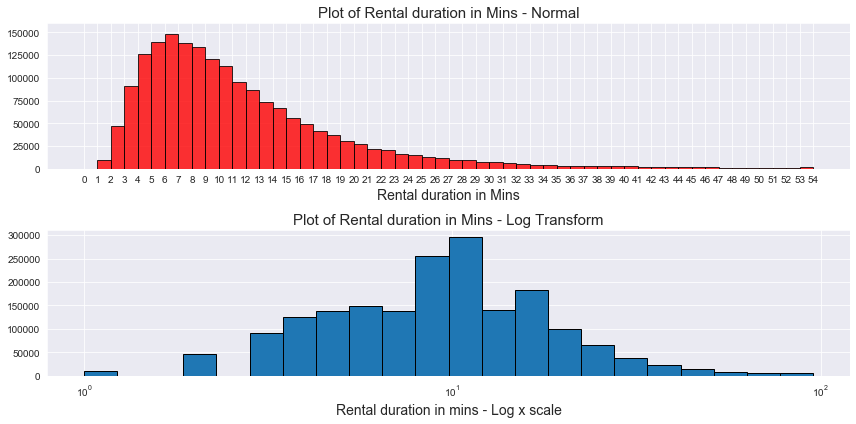

In [7]:
#Here I am creating a Histogram of Rental Duration in mins, as the data is skewed right, I am also using a log transform
fig, ax = plt.subplots(nrows=2, figsize = [12, 6])

bins1 = np.arange(0, df.duration_mins.mean()+40, 1)
bins2 = 10 ** np.arange(0, 2.0, 0.09)

ax[0].hist(data = df, x='duration_mins', bins=bins1, color='r', alpha=0.8, edgecolor='k')

ax[1].hist(data = df, x = 'duration_mins', bins=bins2, edgecolor='k')
plt.xscale('log')

plt.sca(ax[0])
plt.xticks(np.arange(0, 55, 1))
plt.title("Plot of Rental duration in Mins - Normal", fontsize=15)
plt.ylim(0, 160000)
plt.xlabel("Rental duration in Mins", fontsize=14)

plt.sca(ax[1])
plt.title("Plot of Rental duration in Mins - Log Transform", fontsize=15)
plt.xlabel("Rental duration in mins - Log x scale", fontsize=14)

plt.tight_layout()
plt.show()

Observation: From the above plot, it can be seen that distribution of rental duration is right-skewed implyng there are data points which lie on the higher scale i.e. there are rentals for about an hour or so by users. 

From the log transformation, it can be seen that ride duration is roughly bimodal. 

## Distribution of Customer vs Subscribers

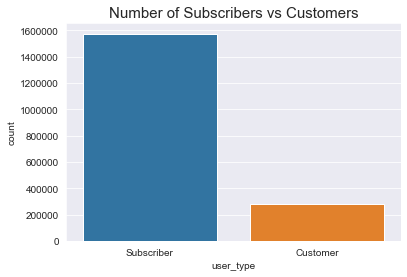

In [8]:
#Basic Countplot to see number of Subscribers anc Customers
sns.countplot(data = df, x = 'user_type')
sns.set(rc={'figure.figsize':(12, 6)})
plt.title("Number of Subscribers vs Customers", fontsize=15)
plt.show()

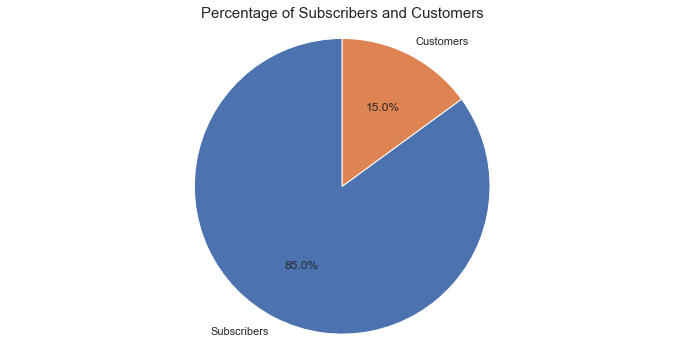

In [9]:
#Percentage of Customers vs Subscribers
a = df.user_type.value_counts()[0]
b = df.user_type.value_counts()[1]
c = a+b
plt.pie([a/c*100, b/c*100], autopct='%1.1f%%', labels = ['Subscribers', 'Customers'], startangle=90)
plt.title('Percentage of Subscribers and Customers', fontsize=15)
plt.axis('equal')
plt.show()

Observation: It can be seen that the number of subscribers are quite large as compared to Customers. In percentage terms, 85% of users are Subscribers and 15% are Customers. 

## Day, Month and Hour wise Rentals

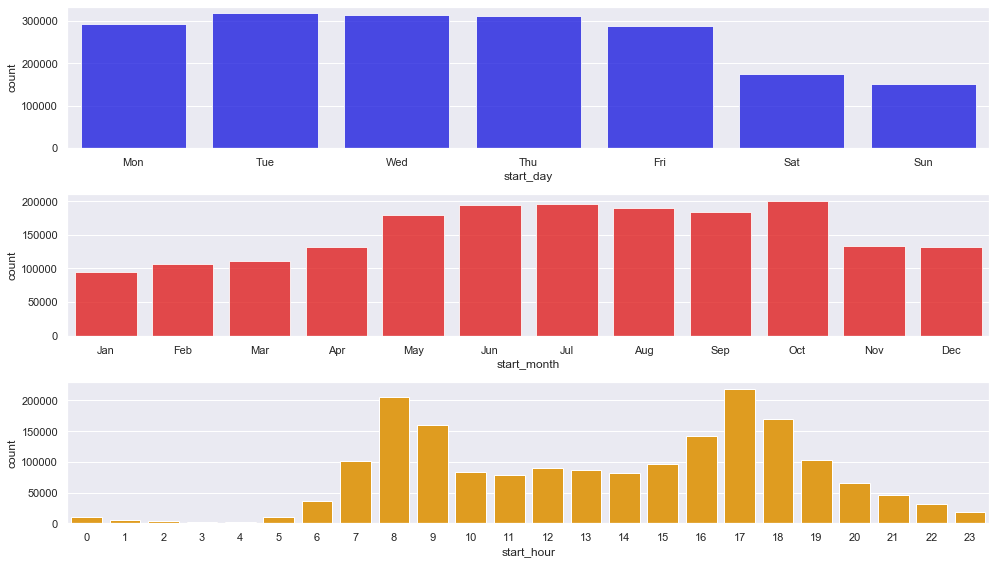

In [10]:
#Pattern of rentals across days of the week, months and hour
fig, ax = plt.subplots(nrows=3, figsize = [14, 8])

sns.countplot(data = df, x = 'start_day', color = 'blue', alpha=0.8, ax = ax[0], order=d_order)
sns.countplot(data = df, x = 'start_month', color = 'red', alpha=0.8, ax = ax[1])
sns.countplot(data = df, x = 'start_hour', color = 'orange', ax = ax[2])

plt.tight_layout()
plt.show()

Observation: It can be seen that the days of the week which sees the most rentals are on weekdays. However, this needs to be explored in more depth as number of subscribers are large which may influence the results. 

Similarly, the months which sees the most rentals are from May till October. 

And finally, the peak hours of rentals are 7-9 in the morning and 4-6 in the evening. 

## How many enrolled in Bike Share scheme

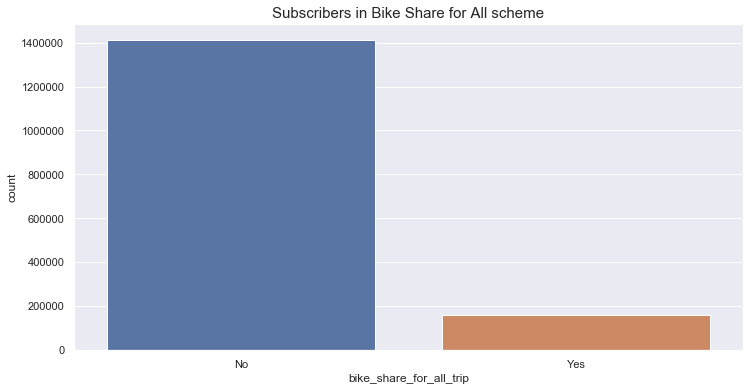

In [11]:
sns.countplot(df[df.user_type == 'Subscriber'].bike_share_for_all_trip)
plt.title("Subscribers in Bike Share for All scheme", fontsize=15)

plt.show()

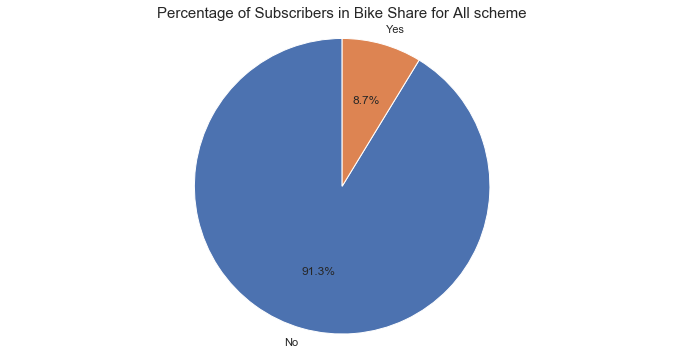

In [12]:
a = df.bike_share_for_all_trip.value_counts()[0]
b = df.bike_share_for_all_trip.value_counts()[1]
c = a+b
plt.pie([a/c*100, b/c*100], autopct='%1.1f%%', labels=['No', 'Yes'], startangle=90)
plt.title("Percentage of Subscribers in Bike Share for All scheme", fontsize=15)
plt.axis('equal')
plt.show()

Observation: It can be seen that very few users are eligible for Bike Share for All schemes, 91.3% of subscribers are not eligible with only 8.7% are eligible. There are no customers who are in the Bike Share for all trip scheme. 

## Distance travelled by Subscribers and Customers

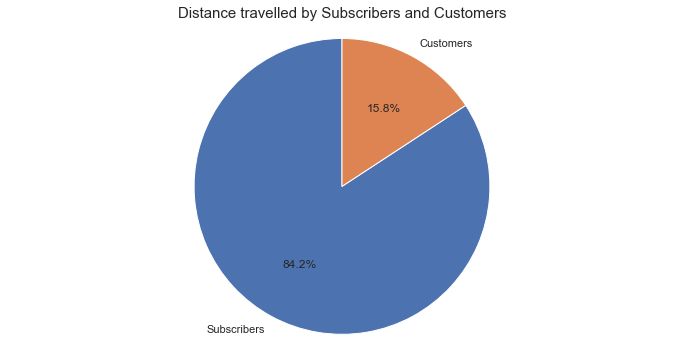

In [13]:
a = df[df.user_type == 'Subscriber'].distance_miles.sum()
b = df[df.user_type == 'Customer'].distance_miles.sum()

d = df.distance_miles.sum()

plt.pie([a/d*100, b/d*100], autopct='%1.1f%%', labels=['Subscribers', 'Customers'], startangle=90)
plt.title("Distance travelled by Subscribers and Customers", fontsize=15)
plt.axis('equal')

plt.show()

Observation: It can be seen that out of total Distance travelled, Subscribers travel 84.2% of the distance. This figure is obviously large as number of subscribers are larger. 

## Percentage of Rental duration for Subscribers and Customers

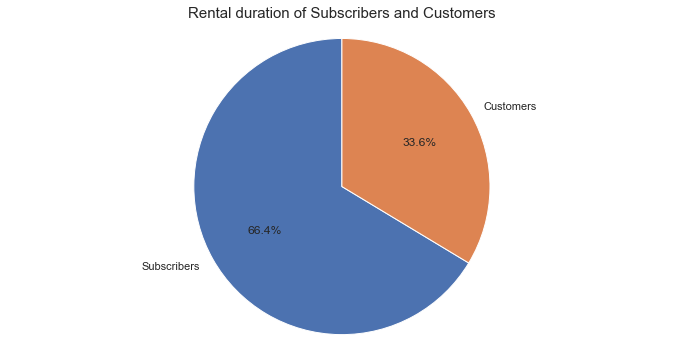

In [14]:
a = df[df.user_type == 'Subscriber'].duration_mins.sum()
b = df[df.user_type == 'Customer'].duration_mins.sum()

d = df.distance_miles.sum()

plt.pie([a/d*100, b/d*100], autopct='%1.1f%%', labels=['Subscribers', 'Customers'], startangle=90)
plt.axis('equal')
plt.title('Rental duration of Subscribers and Customers', fontsize=15)

plt.show()

Observation: It can be seen that out of total Rental duration, Subscribers rent for a total of 66.4% of the total time. This figure is not as large as compared to Customers which was the case of Distance in Miles. That implies Subscribers rent for lesser duration and travel more miles compared to Customers. 

## Bivariate Exploration

## Distribution of Rental distribution in mins - Normal and Log for Subscribers

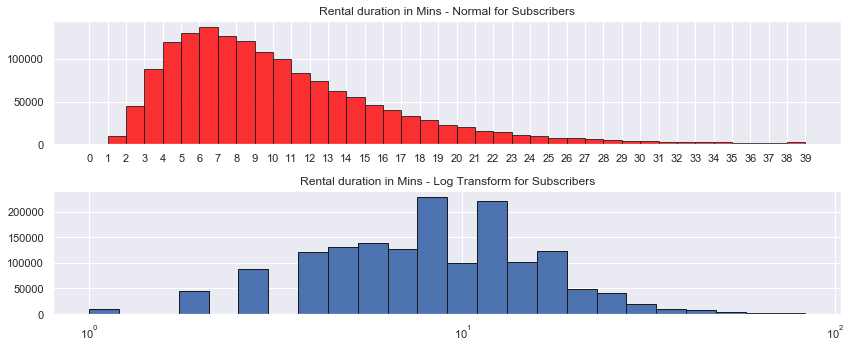

In [15]:
fig, ax = plt.subplots(nrows=2, figsize = [12, 5])

sub = df[df.user_type=='Subscriber']
bins1 = np.arange(0, 40, 1)
bins2 = 10 ** np.arange(0, 2, 0.08)

ax[0].hist(sub.duration_mins, bins=bins1, color='red', alpha=0.8, edgecolor='k')

ax[1].hist(sub.duration_mins, bins=bins2, edgecolor='k')
plt.xscale('log')

plt.sca(ax[0])
plt.xticks(np.arange(0, 40, 1))
plt.title("Rental duration in Mins - Normal for Subscribers")

plt.sca(ax[1])
plt.title("Rental duration in Mins - Log Transform for Subscribers")

plt.tight_layout()
plt.show()

Observation: From the Normal plot, it can be seen that the duration in mins starts decreasing rapidly after rental duration of around 32-33 mins with very few subscribers at the extreme end. Most subscribers are renting the bikes for 5-8 mins. 

From the log transform plot, it can be seen it is also bimodal. 

## Distribution of Rental distribution in mins - Normal and Log for Customers

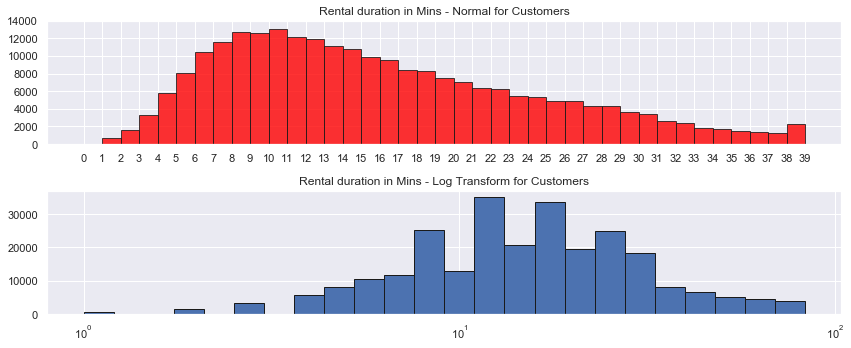

In [16]:
fig, ax = plt.subplots(nrows=2, figsize = [12, 5])

sub = df[df.user_type=='Customer']
bins1 = np.arange(0, 40, 1)
bins2 = 10 ** np.arange(0, 2, 0.08)

ax[0].hist(sub.duration_mins, bins=bins1, color='red', alpha=0.8, edgecolor='k')

ax[1].hist(sub.duration_mins, bins=bins2, edgecolor='k')
plt.xscale('log')

plt.sca(ax[0])
plt.xticks(np.arange(0, 40, 1))
plt.yticks(np.arange(0, 15000, 2000))
plt.title("Rental duration in Mins - Normal for Customers")

plt.sca(ax[1])
plt.title("Rental duration in Mins - Log Transform for Customers")

plt.tight_layout()
plt.show()

Observation: From the Normal plot, it can be seen that the duration in mins doesn't decrease considerably till 39 mins also implying that there may be extreme data points for Customers which also implies that the extreme points observed in the combined plot may be attributed to customers.

Most Customers are renting the bikes for 7-13 mins.

From the log transform plot, it can be seen it is also bimodal. 

## Distribution of Rental distribution in mins - Normal and Log for Bike Share for All scheme Users

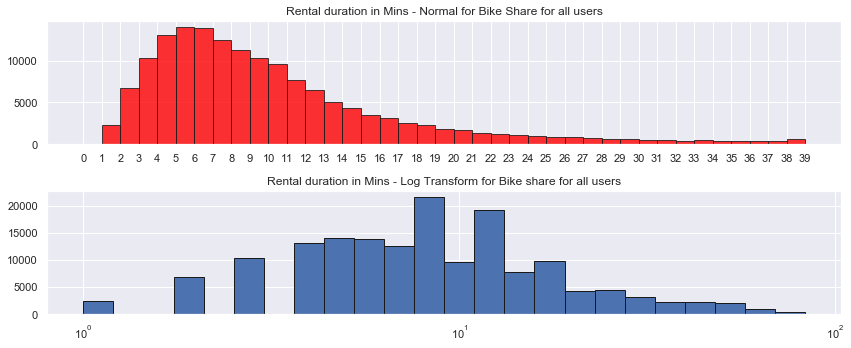

In [17]:
fig, ax = plt.subplots(nrows=2, figsize = [12, 5])

sub = df[df.bike_share_for_all_trip=='Yes']
bins1 = np.arange(0, 40, 1)
bins2 = 10 ** np.arange(0, 2, 0.08)

ax[0].hist(sub.duration_mins, bins=bins1, color='red', alpha=0.8, edgecolor='k')
plt.sca(ax[0])
plt.xticks(np.arange(0, 40, 1))
plt.title("Rental duration in Mins - Normal for Bike Share for all users")

ax[1].hist(sub.duration_mins, bins=bins2, edgecolor='k')
plt.sca(ax[1])
plt.xscale('log')
plt.title("Rental duration in Mins - Log Transform for Bike share for all users")
          
plt.tight_layout()
plt.show()

Observation: From the Normal plot, it can be seen that the duration in mins starts decreasing after rental duration of around 25 mins with moderate number of users at extreme range.

Most users are renting the bikes for 4-7 mins. 

From the log transform plot, it can be seen it is also bimodal. 

## Distance travelled in miles by Subscribers

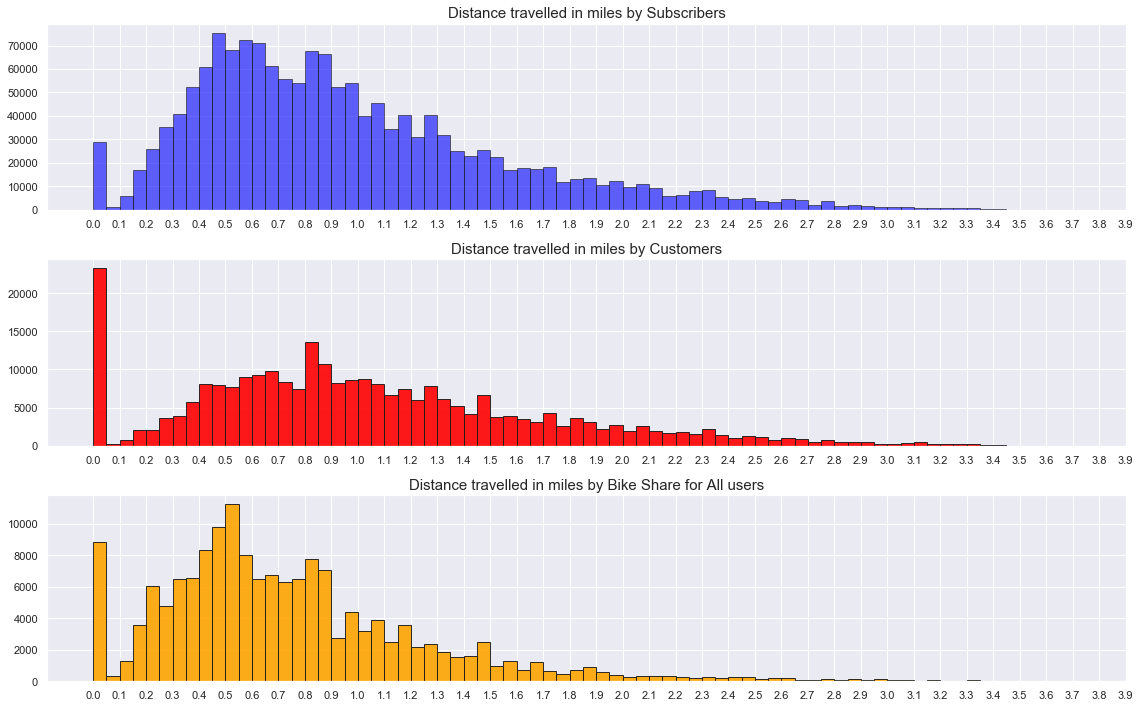

In [18]:
fig, ax = plt.subplots(nrows=3, figsize = [16, 10])

sub = df[df.user_type=='Subscriber']
bins1 = np.arange(0, 3.5, 0.05)
bins2 = 10 ** np.arange(0, 0.5, 0.008)

ax[0].hist(sub.distance_miles, bins=bins1, color='blue', alpha=0.6, edgecolor='k')
plt.sca(ax[0])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Distance travelled in miles by Subscribers", fontsize=15)

cust = df[df.user_type=='Customer']
bins1 = np.arange(0, 3.5, 0.05)
bins2 = 10 ** np.arange(0, 0.5, 0.008)

ax[1].hist(cust.distance_miles, bins=bins1, color='red', alpha=0.9, edgecolor='k')
plt.sca(ax[1])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Distance travelled in miles by Customers", fontsize=15)

ax[2].hist(df[df.bike_share_for_all_trip == 'Yes'].distance_miles, bins=bins1, color='orange', alpha = 0.9, edgecolor='k')
plt.sca(ax[2])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Distance travelled in miles by Bike Share for All users", fontsize=15)


plt.tight_layout()
plt.show()

Observation: It can be seen that most number of Subscribers travel a distance concentrated within 0.4 to 0.6 miles and 0.8 to 0.9 miles range. 

From the previous plot of duration mins, it can be speculated that the demographics of Subscribers may be a mix of 

a) Office goers and students who use the bikes for convenience - shorter distance travel between the nearest train station perhaps to the office or school. 

b) Tourists with subscription who use the bikes more casually to explore the area. 

While for Customers it can be seen that their travel is distributed across all distances. What is unique about this distribution is that a huge number of customers are travelling within 0 to 0.1 miles. 

Thus, one implication of this observation might be that Customers are using the bikes more leisurely than Subscribers.

For Bike share for all scheme users, they are renting it for lesser duration and also riding it for less miles i.e. 0.4 to 0.6 miles comparatively. It might imply that they are using the bikes for day-to-day usage or tasks. 

## Distance Travelled in Miles - the extreme data points

In [19]:
#Proportion of users with Distance in Miles less than 3 miles, 5 miles and 10 miles
print((df[df.distance_miles < 0.3].shape[0]/df.distance_miles.shape[0])*100)
print((df[df.distance_miles < 0.5].shape[0]/df.distance_miles.shape[0])*100)
print((df[df.distance_miles < 1].shape[0]/df.distance_miles.shape[0])*100)
print((df[df.distance_miles > 1].shape[0]/df.distance_miles.shape[0])*100)
print((df[df.distance_miles > 2].shape[0]/df.distance_miles.shape[0])*100)

7.906746942412052
21.687410567239937
60.321228974864326
39.67877102513567
7.757714841113421


Observation: 8% of users are riding the bikes for less than 0.3 miles and similarly 8% are riding for more than 2 miles. Hence 84% of users ride the bikes for 0.3 to 2 miles.  

In [20]:
df[df.distance_miles < 0.3].distance_miles.describe()

count    146429.000000
mean          0.147099
std           0.116833
min           0.000000
25%           0.000000
50%           0.189809
75%           0.254893
max           0.299833
Name: distance_miles, dtype: float64

In [21]:
df[df.duration_mins < 3].duration_mins.describe()

count    56310.000000
mean         1.827562
std          0.377764
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: duration_mins, dtype: float64

Observation: It can be seen that 25% of users who travel less than 0.3 miles travel 0 miles! This could be due to error in recording or distance not recorded at all. 

Also, 25% of users who rent the bikes for less than 3 mins are renting the bikes for 2 mins or less. Again, this could be due to error in recording. 

However, it can also be due to the fact that these users may have rented the bikes and then changed their minds. Hence, the extreme values. These are definitely outliers but are these values invalid? Without knowing this, we cannot remove these values and hence assuming they are valid values, we will move ahead with the analysis

In [22]:
df[df.distance_miles > 10].distance_miles.describe()

count     4.000000
mean     18.241808
std      14.915311
min      10.162667
25%      10.247837
50%      11.111637
75%      19.105608
max      40.581290
Name: distance_miles, dtype: float64

Observation: There are extreme values here also for Distance travelled more than 10 miles but these values also look valid.

## Distribution of Start and End hours of Rentals

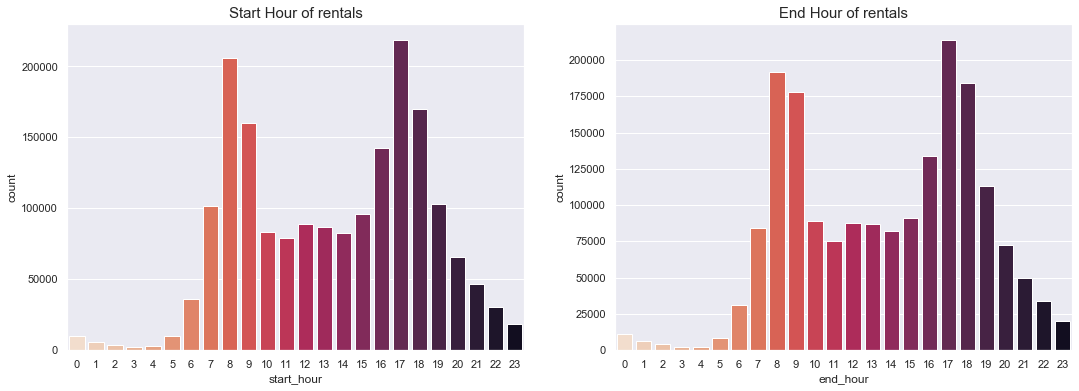

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[18, 6])

sns.countplot(data = df, x = 'start_hour', ax=ax[0], palette='rocket_r')
sns.countplot(data = df, x = 'end_hour', ax=ax[1], palette='rocket_r')

plt.sca(ax[0])
plt.title("Start Hour of rentals", fontsize=15)
plt.sca(ax[1])
plt.title("End Hour of rentals", fontsize=15)

plt.show()

Observation: The start and end hours are surprisingly very similar. It could be due to the fact that there are many rentals which are for very short durations of time.  

The start hours and end hours for rentals peak at 7-9 in the morning and 4-6 in the evening. 

## Distribution of Start hour for Customers and Subscribers

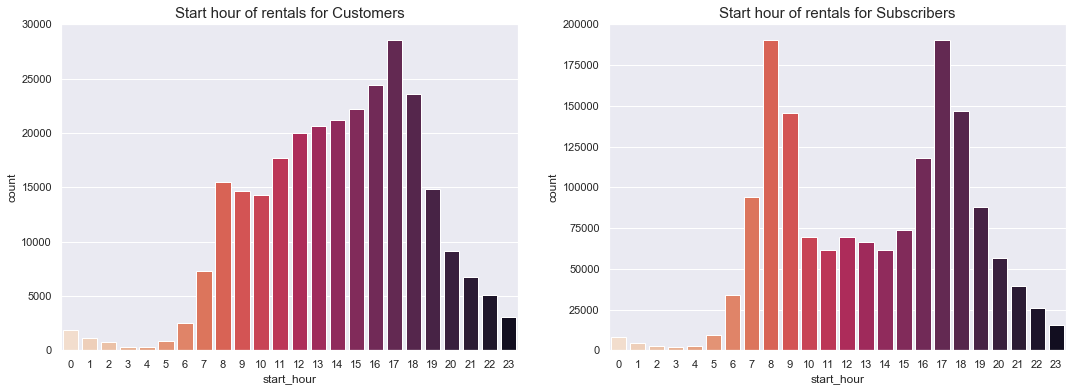

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[18, 6])

sns.countplot(data = df[df.user_type=='Customer'], x = 'start_hour', ax=ax[0], palette='rocket_r')
sns.countplot(data = df[df.user_type=='Subscriber'], x = 'start_hour', ax=ax[1], palette='rocket_r')

plt.sca(ax[0])
plt.title("Start hour of rentals for Customers", fontsize=15)
plt.sca(ax[1])
plt.title("Start hour of rentals for Subscribers", fontsize=15)

plt.show()

Observation: Looking at the above plots, it is clear that there is a stark difference between the start hour of rentals for Customers and Subscribers. Start hour of rentals peak during the later part of the day and towards evening for Customers. 

Start hour of rentals for Subscribers follow the pattern where peak timings are between 7-9 and 4-6 in the evening. Which are usually office and school starting and ending hours. Which again points to the fact that Subscribers may be mostly office goers and school kids and Customers may be travellers. 

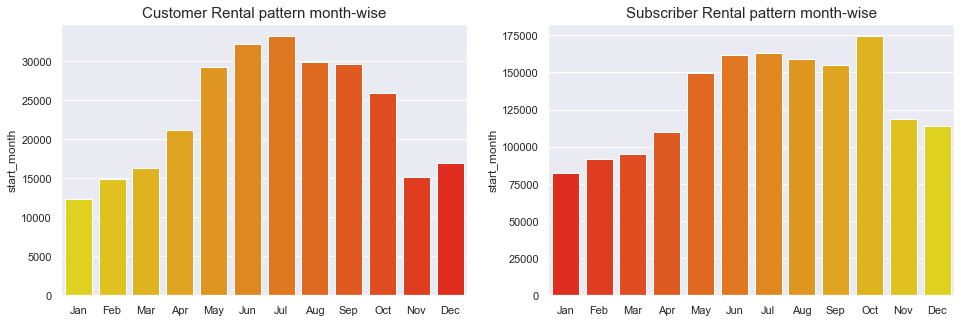

In [25]:
#Which months sees the highest number of rentals - Subs and Customers
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = [16, 5], sharey=False)

a = df[df.user_type == 'Subscriber'].start_month.value_counts()
b = a.index
c = df[df.user_type == 'Customer'].start_month.value_counts()
d = c.index

sns.barplot(b, a, palette='autumn', order=m_order, ax=ax[1])
sns.barplot(d, c, palette='autumn_r', order=m_order, ax=ax[0])

plt.sca(ax[0])
plt.title("Customer Rental pattern month-wise", fontsize=15)
plt.sca(ax[1])
plt.title("Subscriber Rental pattern month-wise", fontsize=15)
plt.show()

Observation: The pattern here is somewhat similar with the months May-October being the months which see the most number of rentals with the peak for Customers on July and for Subscribers on October. 

For Customers, demand peaks for July which sees good weather and demand wanes off during September, October (maybe because the region sees the highest temperature during that time and there aren't many travellers). 

October is one of the busiest months in San Francisco because of a multitude of events and attractions during that time and maybe the company sees a lot of conversions from Customers to Subscribers during that time. 

Again, these are all specualtions. Analysing further could reveal more details along these lines but that is beyond the scope of this project. 

## Duration in mins of Rentals for Subscribers and Customers

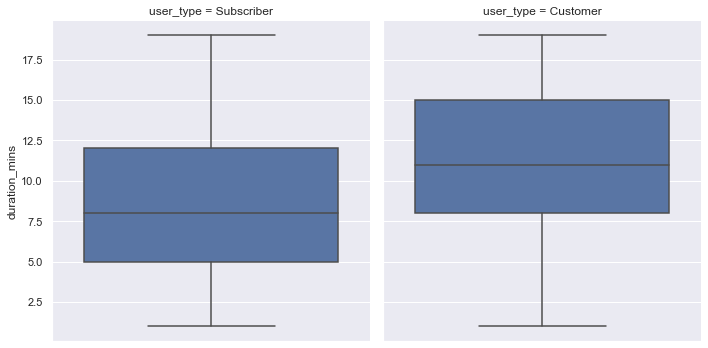

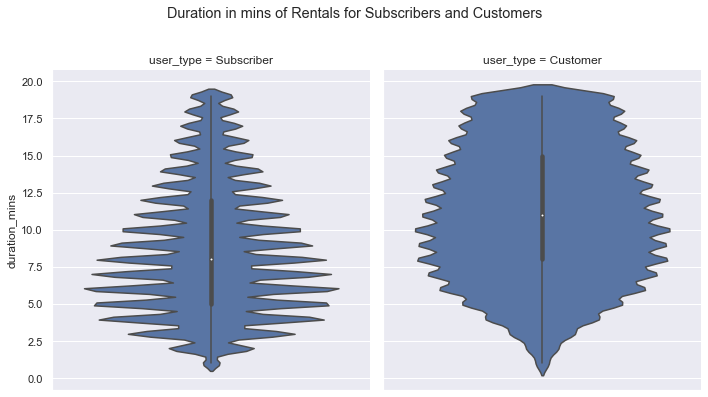

In [26]:
data = df[df.duration_mins < 20]

sns.catplot(data=data, y='duration_mins', col="user_type", kind='box')
sns.catplot(data=data, y='duration_mins', col="user_type", kind='violin')

plt.suptitle("Duration in mins of Rentals for Subscribers and Customers", y=1.1)

plt.show()

Observation: From the box plot, it is now clear what we were pondering before that Customers rent the bikes for longer durations than Subscribers. 

Looking at the violin plots reveal that customers rent the bikes over a wide variety of ranges and for about 7.0 to 12.5 minutes on average while for Subscribers, there seems to be a fixed pattern per time duration as there are spikes during different durations. 

## Distance in Miles travelled by Subscribers and Customers

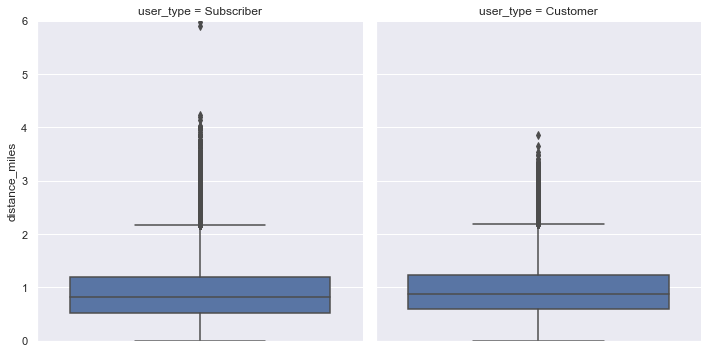

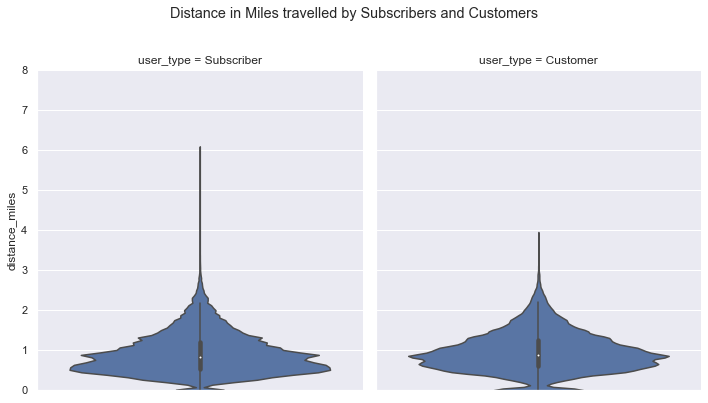

In [27]:
data = df[df.duration_mins < 20]

sns.catplot(data=data, y='distance_miles', col="user_type", kind='box')
plt.ylim(0, 6)
sns.catplot(data=data, y='distance_miles', col="user_type", kind='violin')
plt.ylim(0, 8)

plt.suptitle("Distance in Miles travelled by Subscribers and Customers", y=1.1)

plt.show()

Observation: From the boxplots and the violin plots, it is seen that the distance travelled by Customers and Subscribers are similar except that for Subscribers, there are far more outliers than Customers meaning Subscribers travel more distance overall than Customers.

## Which station sees the most Customer rentals starting point

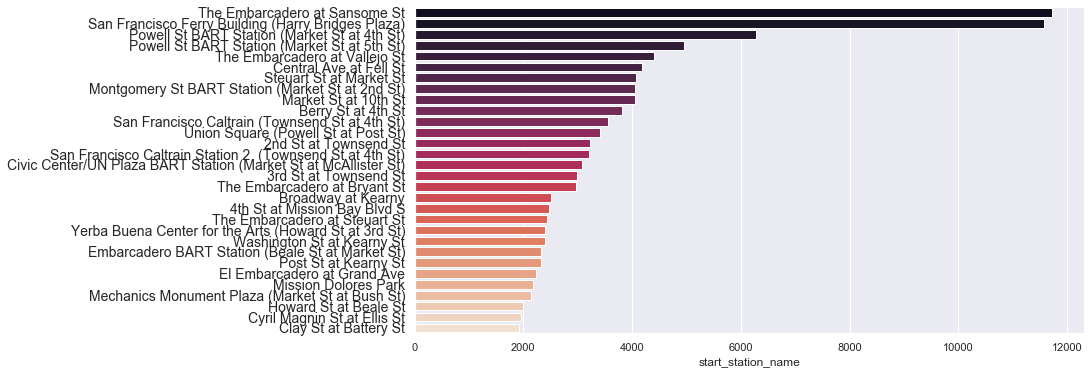

In [28]:
a = df.groupby('start_station_name')['user_type'].count()
test = df[df.user_type == 'Customer']
c = test.start_station_name.value_counts()[:35]
d = c.index

sns.barplot(c, d, palette='rocket')
sns.set(rc={'figure.figsize':(16, 10)})

plt.yticks(fontsize=14)
#plt.tight_layout()
plt.show()

Observations: The top 30 stations which sees the most number of rentals for Customers is shown above. Marketers can make use of this data to understand where to concentrate their resources. 

For our study, let's look at the top 2 locations which sees a huge influx of Customer rentals. A quick Google search reveals that the top 2 locations are very well known tourist locations which sees a large number of tourists and it is a popular place of hangout for kids and adults alike. 

This rekindles my doubt that maybe Customers are mostly tourists who rent the bikes. 

## Which station sees the most Subscriber rentals starting point

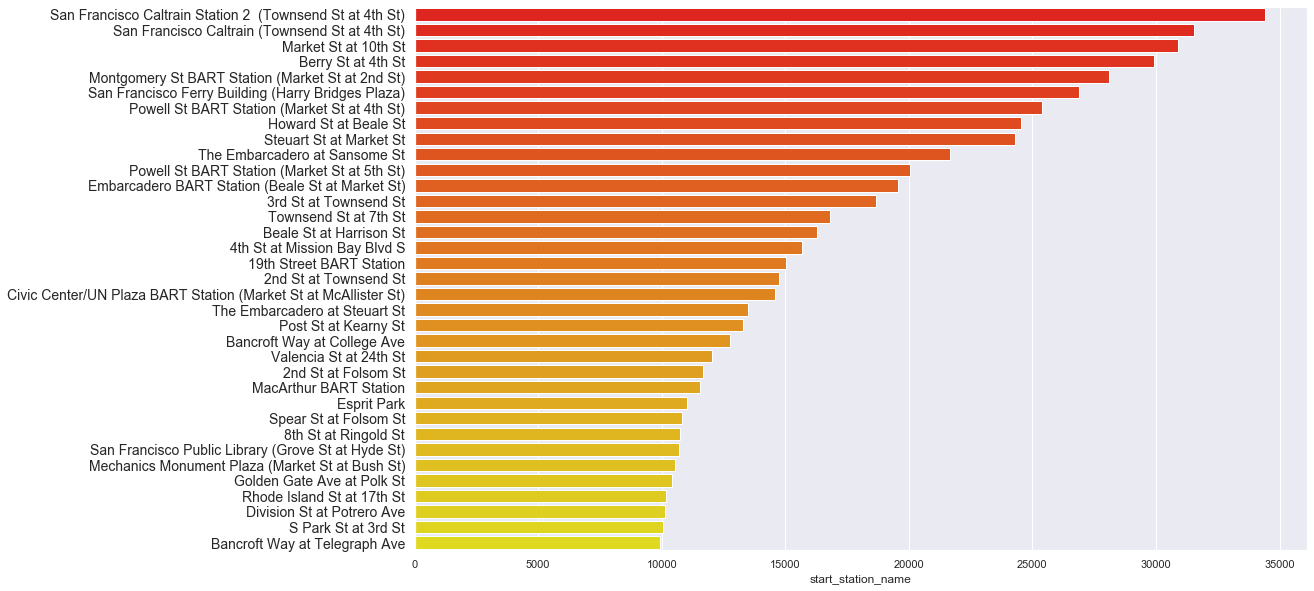

In [29]:
a = df.groupby('start_station_name')['user_type'].count()
test = df[df.user_type == 'Subscriber']
c = test.start_station_name.value_counts()[:35]
d = c.index

sns.barplot(c, d, palette='autumn')
sns.set(rc={'figure.figsize':(16, 10)})

plt.yticks(fontsize=14)
#plt.tight_layout()
plt.show()

Observation:The top 35 rental areas for Subscribers are shown. The top few locations are very different from the Customers locations. The first 2 locations for example seem to be train stations which is used by people to commute. Maybe Subscribers who come to these stations from different locations rent bikes here to commute to nearby schools or office. Again, this is a speculation which can be confirmed by other studies but, it is not within the scope of this project

In [30]:
## Which station sees the most Bike Share for all Trip program users rentals starting point

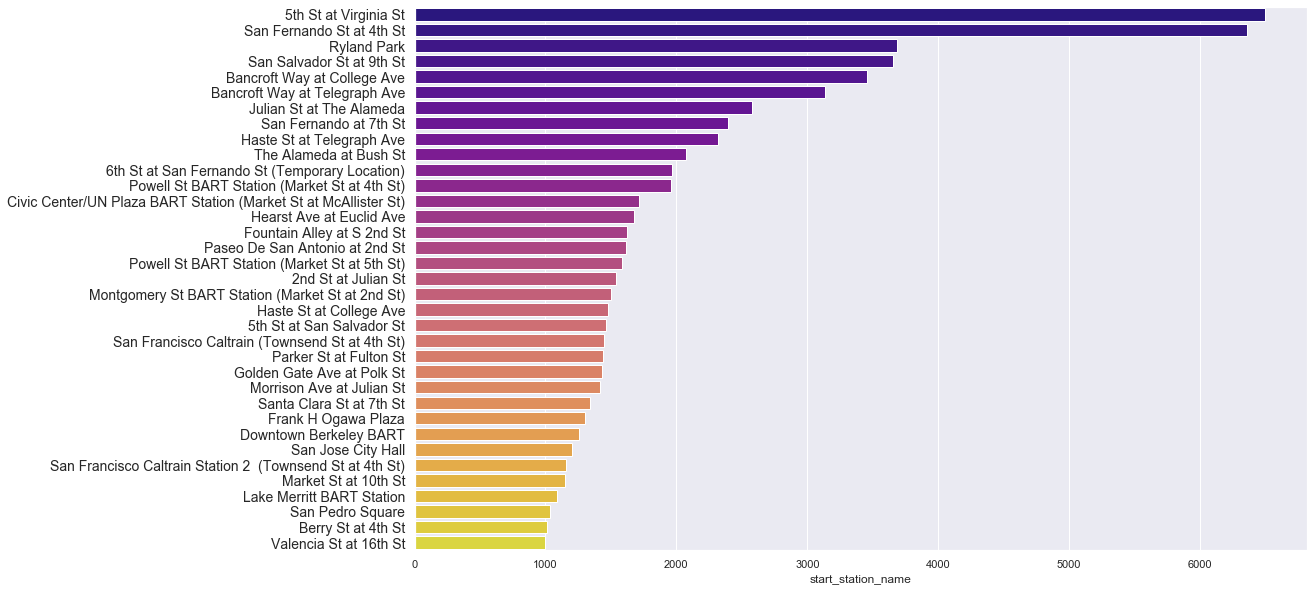

In [31]:
a = df[df.bike_share_for_all_trip == "Yes"].start_station_name.value_counts()[:35]
b = a.index

sns.barplot(a, b, palette='plasma')
sns.set(rc={'figure.figsize':(16, 10)})

plt.yticks(fontsize=14)

plt.show()

Observation: If we see the locations from where Bike Share for All scheme users rent their bikes, we can see that the top 2 and probably the top 10 locations do not match with neither the Customers nor the Subscribers rental locations. A quick google search also reveals that most of these locations are not popular, busy or not a very touristy location. 

## Multivariate Exploration

## Distance travelled vs Duration of rentals for Subscribers

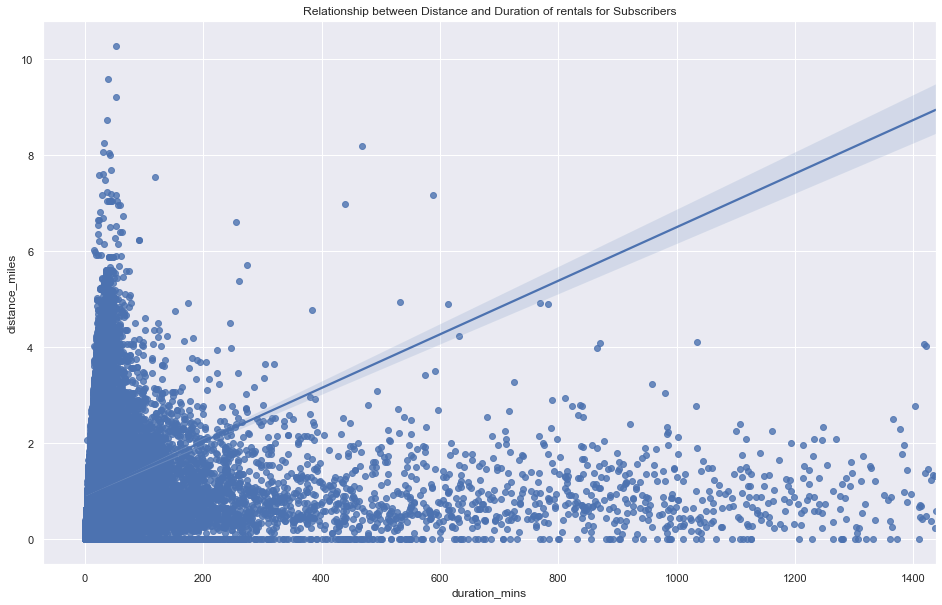

In [32]:
a = df[df.user_type == 'Subscriber'].duration_mins
b = df[df.user_type == 'Subscriber'].distance_miles
sns.regplot(a, b)
plt.title('Relationship between Distance and Duration of rentals for Subscribers')
plt.show()

Observation: It can be seen that initially for increase in Rental duration, the distance in miles travelled by Subscribers increased but eventually as the rental duration increased, there is no visible increase in Distance travelled. Which means that subscribers are travelling more distances in short duration or they are renting for long durations and trvaelling short distances.  

## Distribution of Start Day and Start Hour for Subscribers

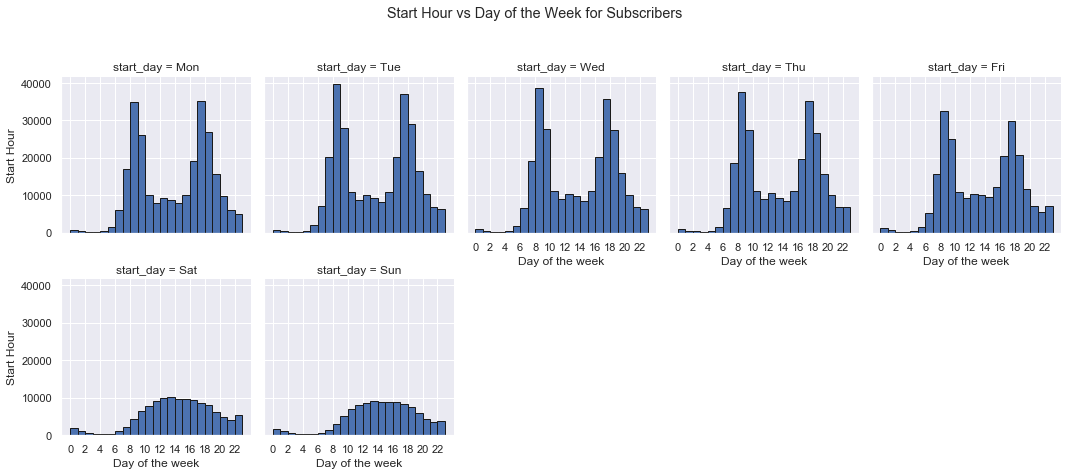

In [33]:
sub = df[df.user_type=='Subscriber']

g = sns.FacetGrid(sub, col='start_day', col_wrap=5, col_order=d_order, sharex=True, sharey=True)
g = (g.map(plt.hist, 'start_hour', bins=np.arange(0, 24, 1), edgecolor='k').set_axis_labels("Day of the week", "Start Hour"))
g.set(xticks=np.arange(0, 24, 2))

plt.suptitle("Start Hour vs Day of the Week for Subscribers", y=1.1)
plt.tight_layout()
plt.show()

Observation: The plot shows the Facet grid plots of Start Hour vs Day of the Week for Subscribers. The plot reveals interesting details. 

Subscribers seem to be renting the bikes during weekdays mostly (office and school days) with the exact same pattern of start hour every day (office or school hours). 

During Saturdays and Sundays, demand wanes off with very few Subscribers renting the bikes compared to weekdays and also the start hour seem to start late than usual. 

So, Subscribers can very likely be office goers and students. 

## Distribution of Start Day and Start Hour for Customers

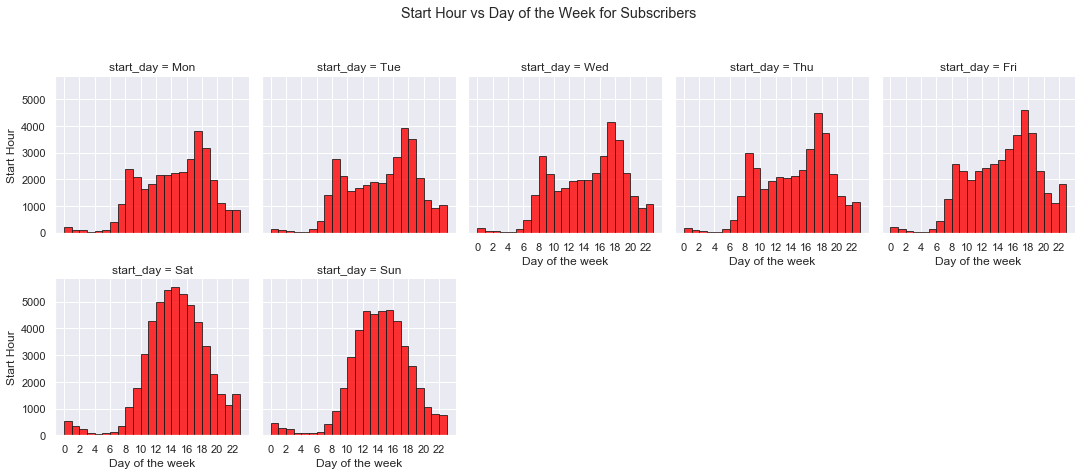

In [34]:
cust = df[df.user_type=='Customer']

g = sns.FacetGrid(cust, col='start_day', col_wrap=5, col_order=d_order, sharey=True)
g = (g.map(plt.hist, 'start_hour', bins=np.arange(0, 24, 1), color='red', alpha=0.8, edgecolor='k') \
     .set_axis_labels("Day of the week", "Start Hour"))
g.set(xticks=np.arange(0, 24, 2))

plt.suptitle("Start Hour vs Day of the Week for Subscribers", y=1.1)
plt.show()

Observation: For Customers, during weekdays, the start hour starts late for rentals compared to Subscribers. During weekends, demands peaks and is much more compared to weekdays. The demand peaks in the afternoon and continues on till evening. 

So, Customers may be tourists in that area. 

## Heat map of Star Time Hour vs Day of the week for Subscriber Rentals.

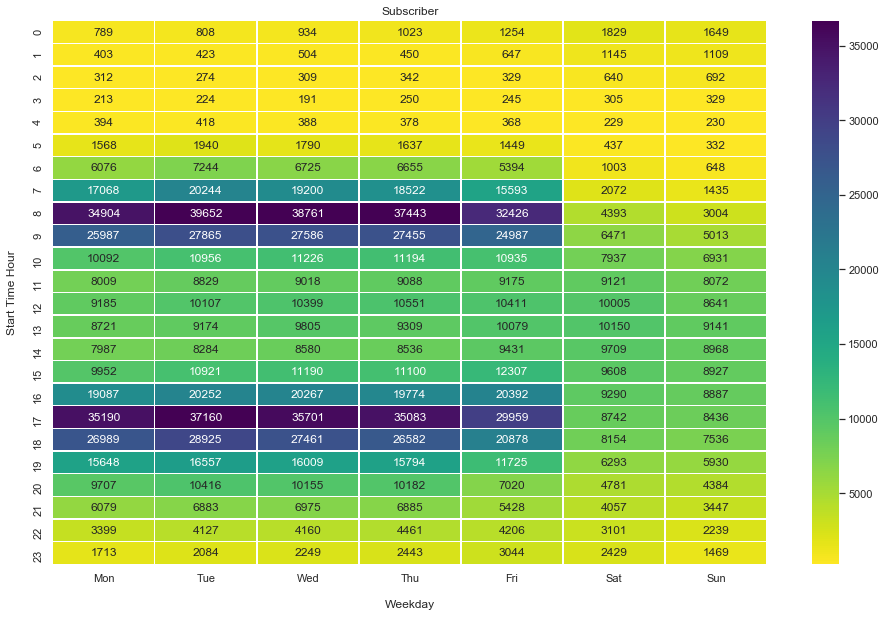

In [35]:
test_sub = df[df.user_type=='Subscriber']

test_sub = test_sub.groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();

test_sub = test_sub.pivot('start_hour', 'start_day', 'bike_id')

test2 = test_sub[d_order]

heat_map = sns.heatmap(test2, cmap = 'viridis_r', annot=True, robust=True, fmt='d', linewidths=.5)

plt.title('Subscriber', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

Observation: The heat map corroborates the observation seen previously in the case of Subscribers that maximum rentals are during Weekdays than on Weekends with 7-9 in the morning and 4-6 in the evening seeing the maximum rentals. 

Demands falls off rapidly during weekends when the schools and offices are closed and Subscribers do not need to commute as usual. 

## Heat map of Star Time Hour vs Day of the week for Customer Rentals.

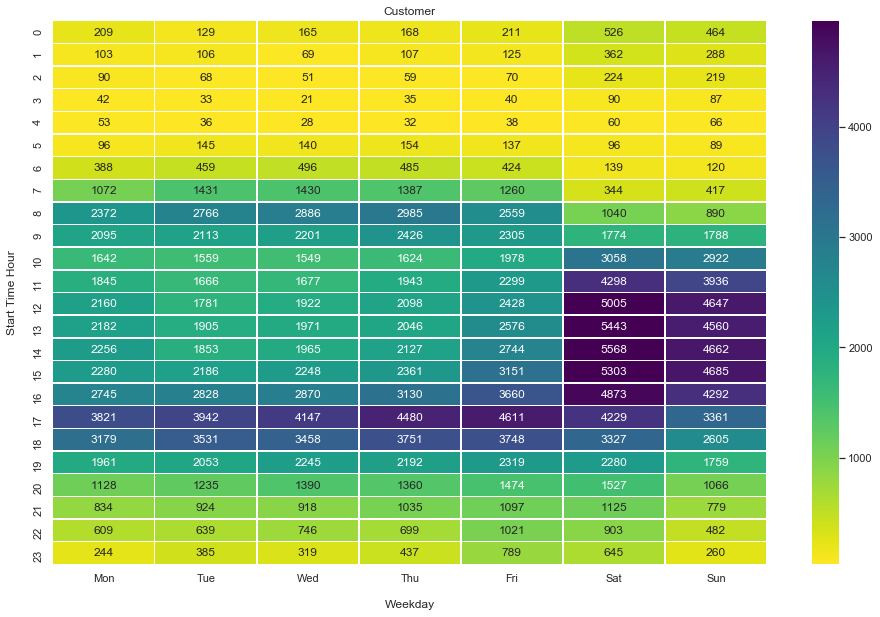

In [36]:
test_cust = df[df.user_type=='Customer']

test_cust = test_cust.groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index();

test_cust = test_cust.pivot('start_hour', 'start_day', 'bike_id')

test2 = test_cust[d_order]

heat_map = sns.heatmap(test2, cmap = 'viridis_r', annot=True, robust=True, fmt='d', linewidths=.5)

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

Observation: The Heat Map corroborates the previous observation that Customers rent the bikes mostly during weekends, where the dark blue area shows the maximum concentration of rentals and number of rentals during weekends which is much higher(2x or 3x) than on weekdays. So, Customers might be tourists as weekends see the maximum influx of tourists and tourist activities. 

## Plotting the locations in Map of Start Stations of Rentals for Subscribers, Customers and Bike Share for All users

In [37]:
#Creating a separate Dataframe with relevant fields
df_map = df[['start_station_name', 'start_station_latitude', 'start_station_longitude', \
             'end_station_name', 'end_station_latitude', 'end_station_longitude', \
             'user_type', 'bike_share_for_all_trip']]

In [38]:
#Converting to appropriate Datatypes
df_map.start_station_latitude = df_map.start_station_latitude.astype(str)
df_map.start_station_longitude = df_map.start_station_longitude.astype(str)
df_map.end_station_latitude = df_map.end_station_latitude.astype(str)
df_map.end_station_longitude = df_map.end_station_longitude.astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Top 40 Start locations of rentals for Customers

In [39]:
#We are using Folium to map the locations which uses Open Street Map as base. 
m = folium.Map(location=[37.8272, -122.2913], tiles='Stamen Terrain', zoom_start=10)
test = df_map[df_map.user_type == 'Customer']
c = test.start_station_latitude.value_counts()[:40]
d = c.index

test = df_map[df_map.user_type == 'Customer']
c = test.start_station_longitude.value_counts()[:40]
e = c.index

for a, b in zip(d, e):
    
    pop = df_map[df_map.start_station_latitude==a].start_station_name.unique()[0]
    
    tooltip = 'Click me!'
    icon=folium.Icon(color='black', icon='bicycle', icon_color="red", prefix='fa', icon_size=(0, 0))
    folium.Marker(location = [float(a), float(b)], popup=pop, tooltip=tooltip, icon=icon).add_to(m)
    
m.save("my_map3.html") 

## Note: This method creates an HTML file, I have taken a snapshot from the same file and uploaded here

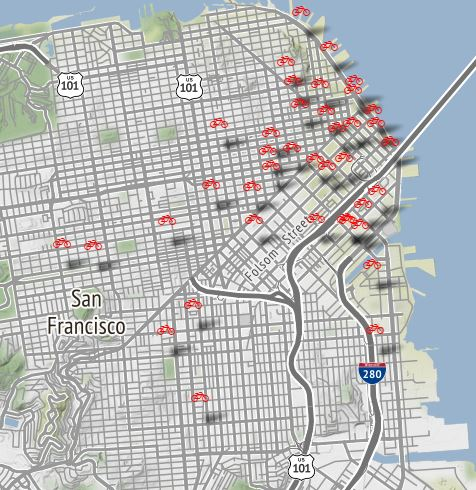

In [40]:
from IPython.display import Image
Image(filename='1.jpg') 

Observation: The image shows the top locations from where Customers are renting the bikes. The locations seem to be distributed randomly and doesn't have any pattern. 

## Top 40 Start locations of rentals for Subscribers

In [41]:
m = folium.Map(location=[37.8272, -122.2913], tiles='Stamen Terrain', zoom_start=10)

test = df_map[df_map.user_type == 'Subscriber']
c = test.start_station_latitude.value_counts()[:40]
d = c.index

test = df_map[df_map.user_type == 'Subscriber']
c = test.start_station_longitude.value_counts()[:40]
e = c.index

for a, b in zip(d, e):
    
    pop = df_map[df_map.start_station_latitude==a].start_station_name.unique()[0]
    
    tooltip = 'Click me!'
    icon=folium.Icon(color='black', icon='bicycle', icon_color="red", prefix='fa', icon_size=(0, 0))
    folium.Marker(location = [float(a), float(b)], popup=pop, tooltip=tooltip, icon=icon).add_to(m)
    
m.save("my_map4.html") 

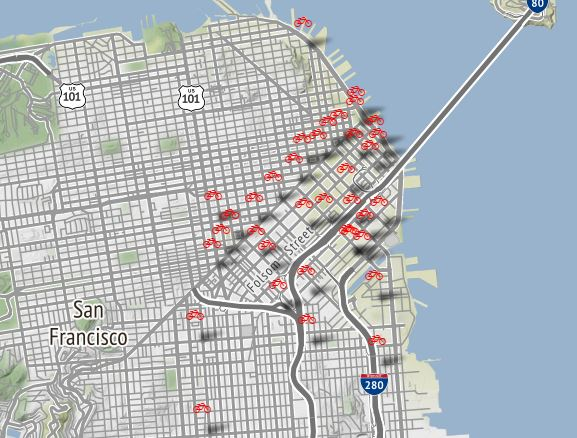

In [42]:
Image(filename='2.jpg') 

Observation: The image shows the top locations from where Subscribers are renting the bikes. The points seem to be less scattered than the previous plot and seem to be concentrated around a single location. (This is the financial district area, a google search revealed). However, coming to any conclusions based on this will be far-fetched and inaccurate. 

## Top 40 Start locations of rentals for Bike Share for all trip users

In [43]:
m = folium.Map(location=[37.8272, -122.2913], tiles='Stamen Terrain', zoom_start=10)

test = df_map[df_map.bike_share_for_all_trip=='Yes']
c = test.start_station_latitude.value_counts()[:40]
d = c.index

test = df_map[df_map.bike_share_for_all_trip=='Yes']
c = test.start_station_longitude.value_counts()[:40]
e = c.index

for a, b in zip(d, e):
    
    pop = df_map[df_map.start_station_latitude==a].start_station_name.unique()[0]
    
    tooltip = 'Click me!'
    icon=folium.Icon(color='black', icon='bicycle', icon_color="red", prefix='fa', icon_size=(0, 0))
    folium.Marker(location = [float(a), float(b)], popup=pop, tooltip=tooltip, icon=icon).add_to(m)
    
m.save("my_map5.html") 

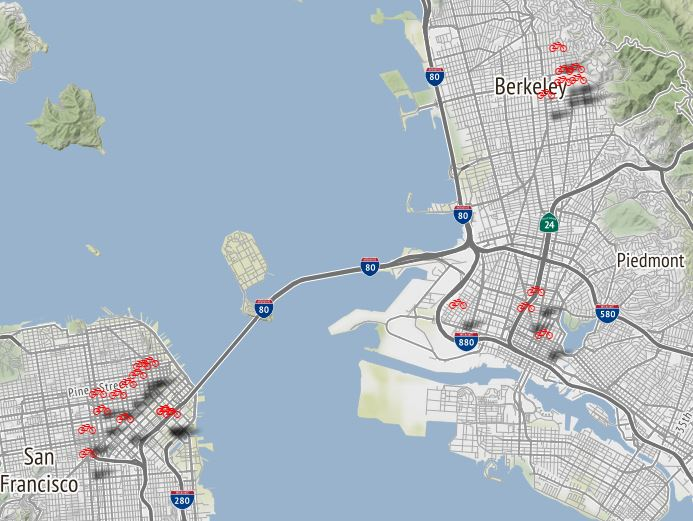

In [44]:
Image(filename='3.jpg') 

Observation: The locations here seem to be dispersed across a wide area and shows rentals are being made from varied locations and not just a single concentrated area. Without knowing the exact demographics of these regions, we cannot come to a definite conclusion. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There is a definite relationship between Start Day, Start month, Start Hour of rental and type of Users. 


There seems to be a relationship between Distance travelled, Rental Duration for Subscribers. 


There also seems to be a relation between user type and Start station from where bikes are rented. 


### Were there any interesting or surprising interactions between features?

A few very interesting interactions were noticed which could possible lead to interesting conclusions. 


It was observed that Subscribers rented the bikes for lesser duration than Customers but travelled comparatively more distance than Customers. This could imply an urgency and a sense of purpose in their rental patterns. 


There was also an interesting relationship between months when rental is made and type of users. 


There seems to be a pattern between the start station of rental and type of users. There aren't much information about the locations but there is a definite relationship between where the rental is being made vs type of users. For example, Customers tend to be concentrated mainly around touristy areas whereas Subscribers are concentrated around office districts or financial areas. 


Perhaps the most interesting relationship is between Start Day, Start Hour and type of users which give a major hint about the nature of users. Subscribers seem to be mainly office goers or students while Customers seem to be mainly tourists. 



## Summary

This project has the ability to benefit a wide variety of people. 

It is environmental friendly, pocket friendly and also caters to a wide variety of people. 

Subscribers who can mostly be called regular commuters benefit from a quick eco-friendly and budget-friendly yet flexible, city transportation option. 

Customers have a sustainable and easy way to explore the beautiful Bay area while people from all socioeconomic classes can enjoy convenient and affordable transport. 

The system uses two types of clients: Subscribers and Clients.

Subscribers are primarily frequent drivers, making brief rides to and from work, renting a bike at 7-9am and 4-6pm on weekdays, and Customers are generally tourists who use the system to explore the Bay Area mainly on weekends.